In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [38]:
df = pd.read_csv('Valve_Player_Data.csv')
df

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,https://steamcharts.com/app/435150,2016-09-01,Divinity: Original Sin 2


In [61]:

df['Date']=pd.to_datetime(df['Date'])
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5173 entries, 0 to 5269
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Month_Year    5173 non-null   object        
 1   Avg_players   5173 non-null   float64       
 2   Gain          5173 non-null   float64       
 3   Percent_Gain  5173 non-null   object        
 4   Peak_Players  5173 non-null   int64         
 5   URL           5173 non-null   object        
 6   Date          5173 non-null   datetime64[ns]
 7   Game_Name     5173 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 363.7+ KB


In [62]:
June = df[df['Date'].dt.month == 6]
June


,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
15,June 2020,671647.46,-97147.79,-12.64%,1009467,https://steamcharts.com/app/730,2020-06-01,Counter Strike: Global Offensive
27,June 2019,389376.72,24959.42,+6.85%,587724,https://steamcharts.com/app/730,2019-06-01,Counter Strike: Global Offensive
39,June 2018,266862.24,4691.36,+1.79%,420261,https://steamcharts.com/app/730,2018-06-01,Counter Strike: Global Offensive
51,June 2017,374388.04,2558.70,+0.69%,614621,https://steamcharts.com/app/730,2017-06-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5212,June 2021,8301.42,1114.69,+15.51%,14431,https://steamcharts.com/app/435150,2021-06-01,Divinity: Original Sin 2
5224,June 2020,11258.09,-1444.23,-11.37%,20039,https://steamcharts.com/app/435150,2020-06-01,Divinity: Original Sin 2
5236,June 2019,9077.85,1017.31,+12.62%,16892,https://steamcharts.com/app/435150,2019-06-01,Divinity: Original Sin 2
5248,June 2018,7135.39,-437.03,-5.77%,13409,https://steamcharts.com/app/435150,2018-06-01,Divinity: Original Sin 2


In [63]:
print("2021 \n",June.groupby('Game_Name').size(), "\n")

2021 
 Game_Name
7 Days to Die                            8
ARK: Survival Evolved                    7
Age of Empires II: Definitive Edition    2
Apex Legends                             1
Arma 3                                   9
                                        ..
World of Warships                        4
Yu-Gi-Oh! Duel Links                     4
eFootball PES 2021 SEASON UPDATE         1
tModLoader                               2
雀魂麻将(MahjongSoul)                        1
Length: 91, dtype: int64 



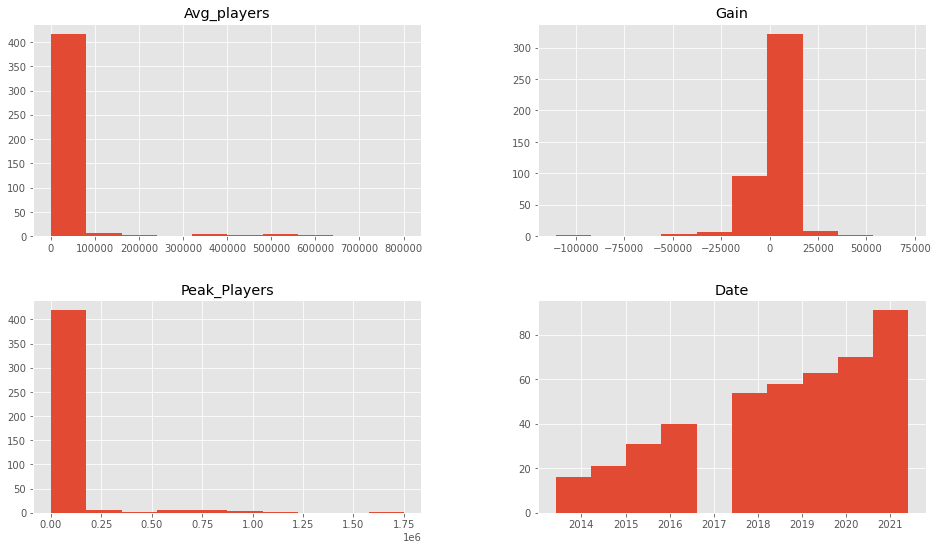

In [64]:
June.drop(['Game_Name'], axis='columns').hist()
plt.show()

C:\Users\ricar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ricar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ricar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ricar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ricar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ricar\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

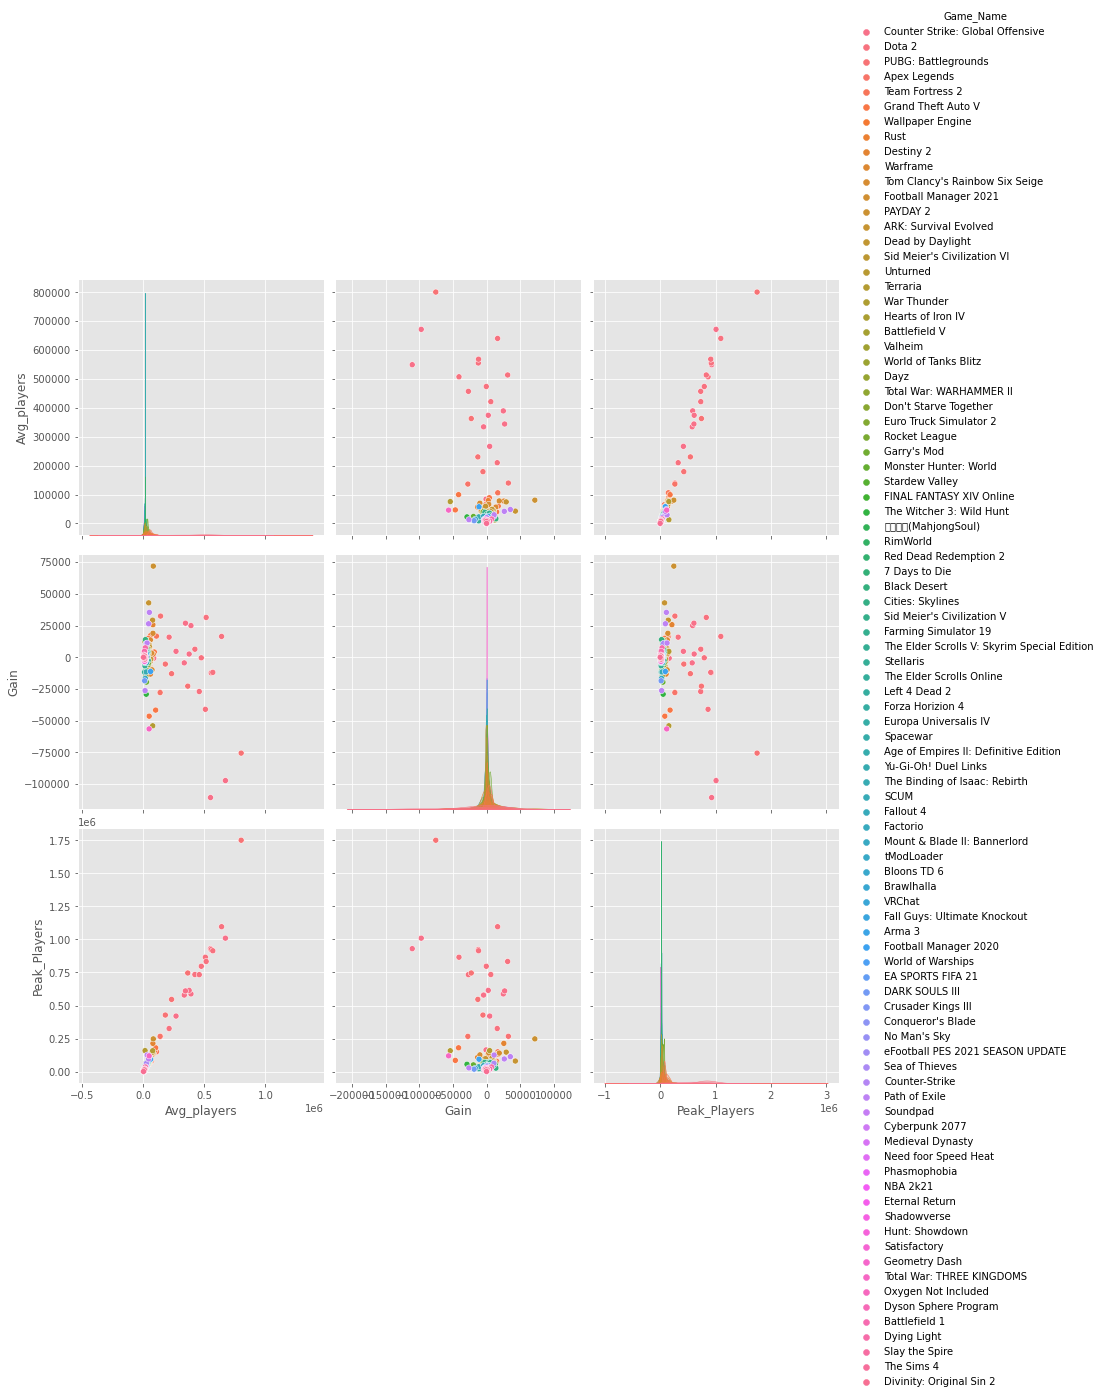

In [65]:
sb.pairplot(June.dropna(), hue='Game_Name', height=4, vars=["Avg_players","Gain","Peak_Players"], kind='scatter')

In [66]:
X = np.array(June[["Avg_players","Gain","Peak_Players"]])
Y = np.array(June['Game_Name'])
X.shape

(444, 3)

C:\Users\ricar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


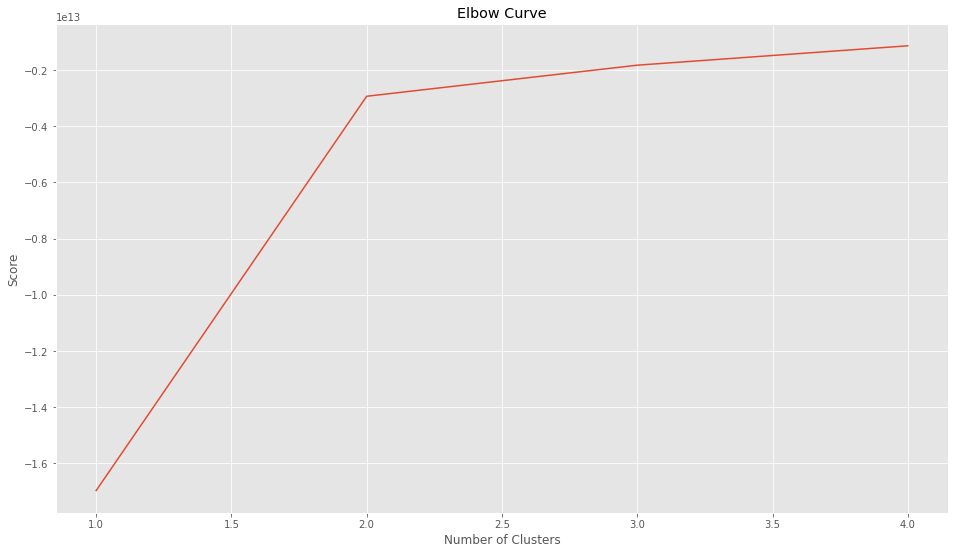

In [67]:
Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
#kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [68]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print("June \n",centroids,"\n")

June 
 [[ 1.94708170e+04  4.54850867e+02  3.69272646e+04]
 [ 4.82069292e+05 -1.80765488e+04  8.39405118e+05]] 



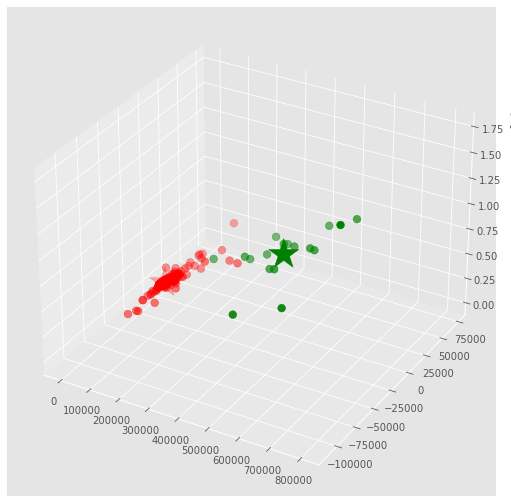

In [69]:
# Predicting the clusters in June
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colors=['red','green']
assign=[]
for row in labels:
    assign.append(colors[row])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assign,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colors, s=1000)

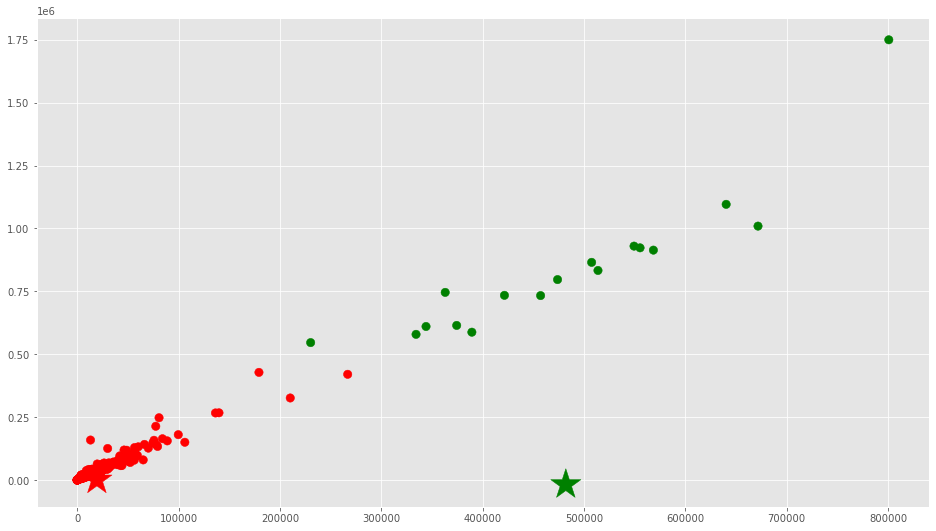

In [70]:
f1 = June['Avg_players'].values
f2 = June['Peak_Players'].values

plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000)
plt.show()

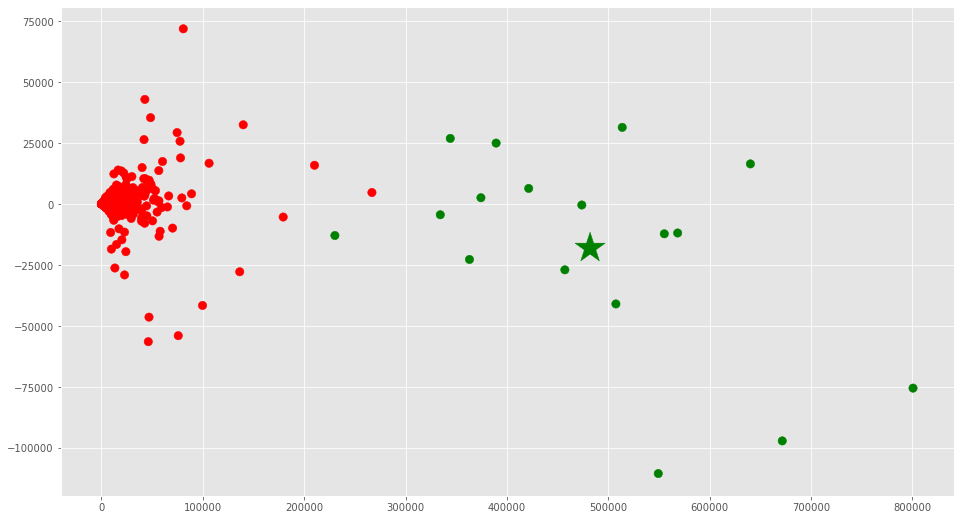

In [71]:
f1 = June['Avg_players'].values
f2 = June['Gain'].values

plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000)
plt.show()

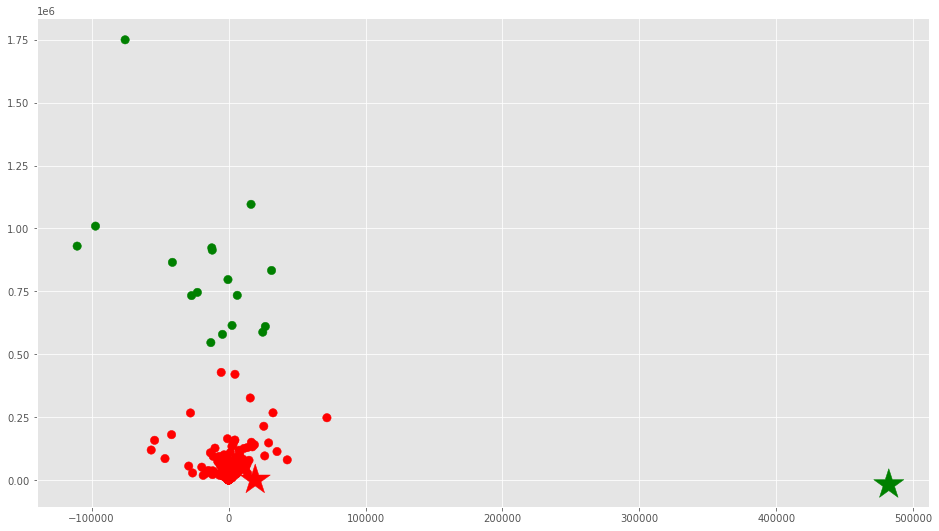

In [72]:
f1 = June['Gain'].values
f2 = June['Peak_Players'].values

plt.scatter(f1, f2, c=assign, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000)
plt.show()

In [73]:

copy =  pd.DataFrame()
copy['user']=June['Month_Year'].values
copy['category']=June['Game_Name'].values
copy['label'] = labels;
amountByGroup =  pd.DataFrame()
amountByGroup['color']=colors
amountByGroup['amount']=copy.groupby('label').size()
amountByGroup

,color,amount
0,red,427
1,green,17


In [74]:
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
group_referrals.groupby('category').size()

category
7 Days to Die                            8
ARK: Survival Evolved                    7
Age of Empires II: Definitive Edition    2
Apex Legends                             1
Arma 3                                   9
                                        ..
World of Warships                        4
Yu-Gi-Oh! Duel Links                     4
eFootball PES 2021 SEASON UPDATE         1
tModLoader                               2
雀魂麻将(MahjongSoul)                        1
Length: 91, dtype: int64

In [75]:
group_referrer_index = copy['label'] == 1
group_referrals = copy[group_referrer_index]
group_referrals.groupby('category').size()

category
Counter Strike: Global Offensive    6
Dota 2                              8
PUBG: Battlegrounds                 3
dtype: int64